In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [40]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

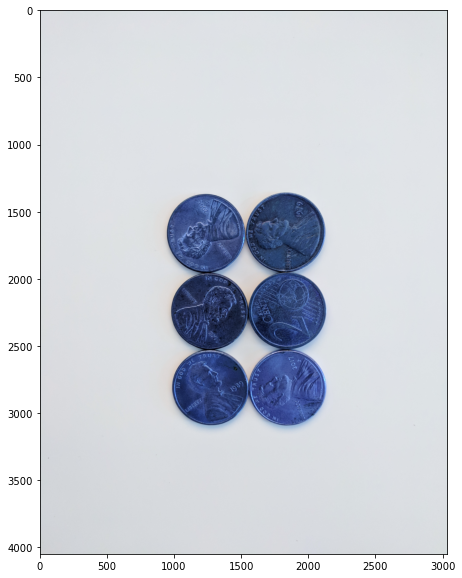

In [41]:
display(sep_coins)

In [42]:
sep_blur = cv2.medianBlur(sep_coins,25)

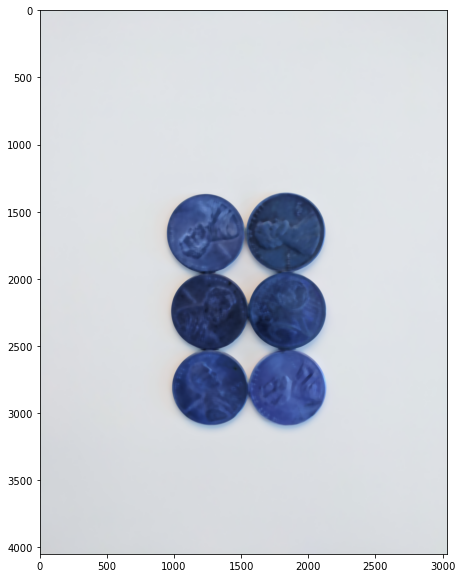

In [43]:
display(sep_blur)

In [44]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

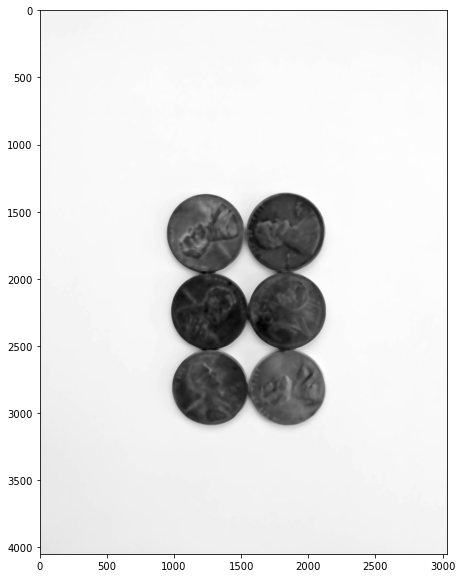

In [45]:
display(gray_sep_coins)

In [46]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

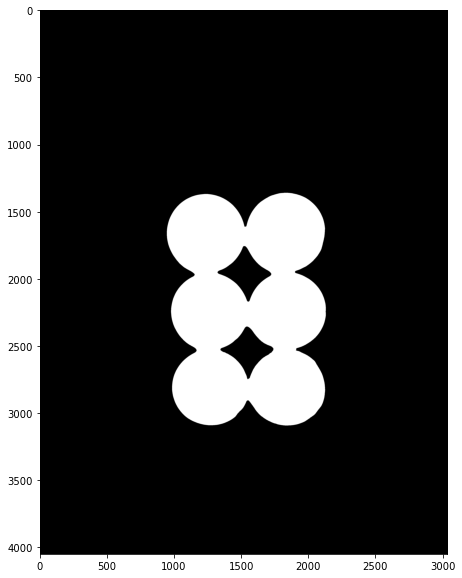

In [47]:
display(sep_thresh)

In [48]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [49]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

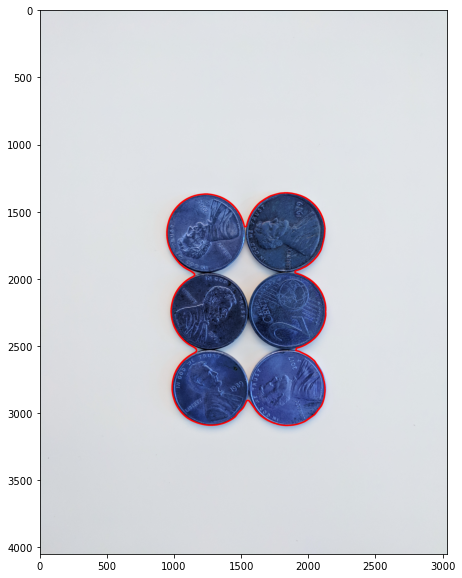

In [50]:
display(sep_coins)

In [51]:
img = cv2.imread('../DATA/pennies.jpg')

In [52]:
img = cv2.medianBlur(img,35)

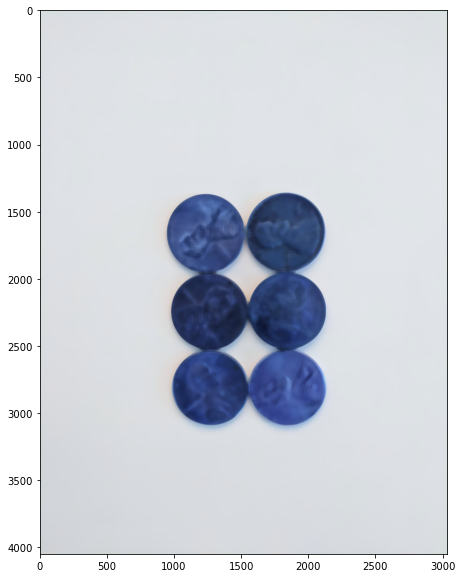

In [53]:
display(img)

In [54]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [55]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

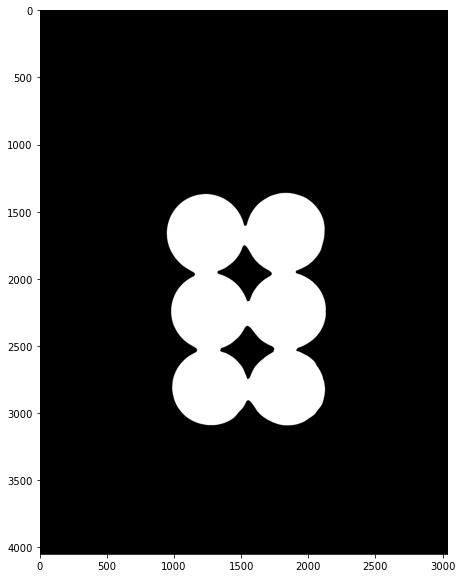

In [56]:
display(thresh)

In [57]:
kernel = np.ones((3,3),np.uint8)

In [58]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,2)

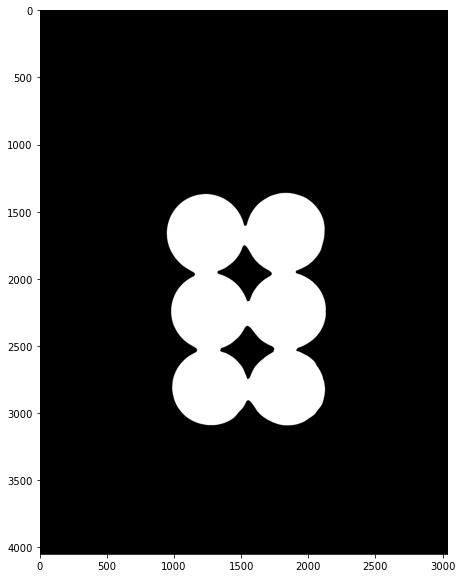

In [59]:
display(opening)

In [60]:
sure_bg = cv2.dilate(opening,kernel,3)

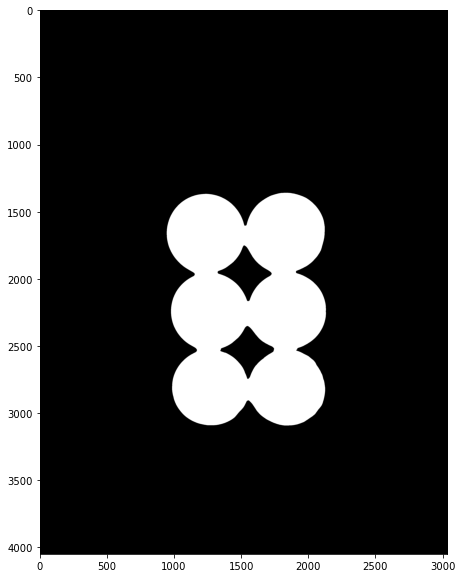

In [61]:
display(sure_bg)

In [62]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

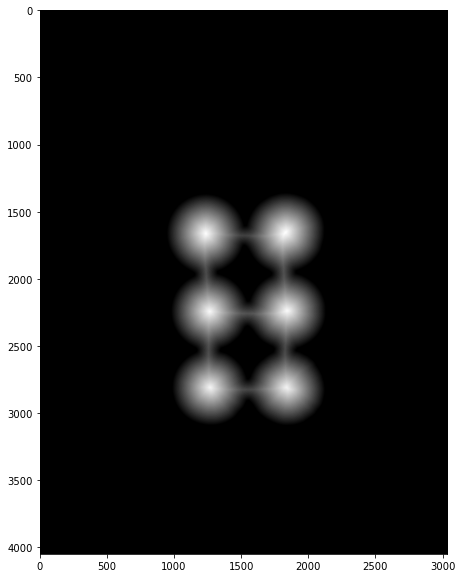

In [63]:
display(dist_transform)

In [64]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

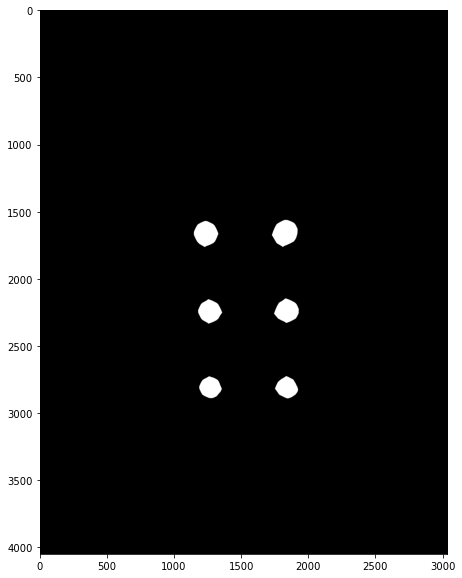

In [65]:
display(sure_fg)

In [66]:
sure_fg = np.uint8(sure_fg)

In [68]:
unkonwn = cv2.subtract(sure_bg,sure_fg)

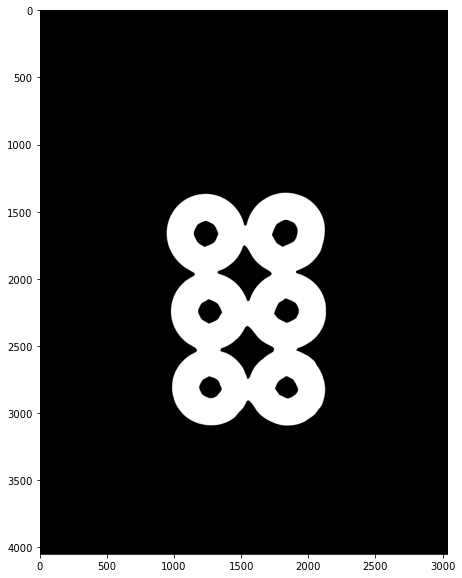

In [69]:
display(unkonwn)

In [70]:
ret, markers = cv2.connectedComponents(sure_fg)

In [72]:
markers = markers + 1

In [73]:
markers[unkonwn==255] = 0

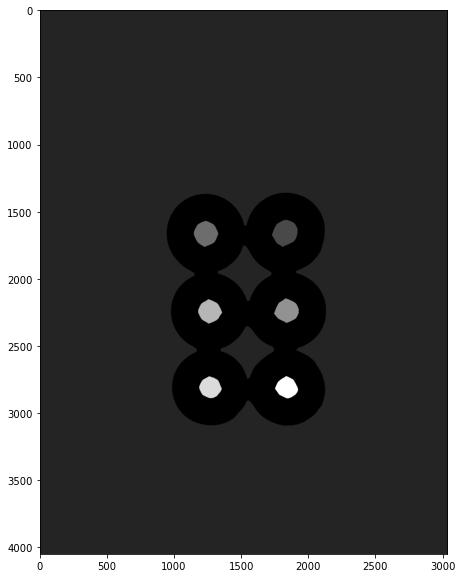

In [74]:
display(markers)

In [75]:
markers = cv2.watershed(img,markers)

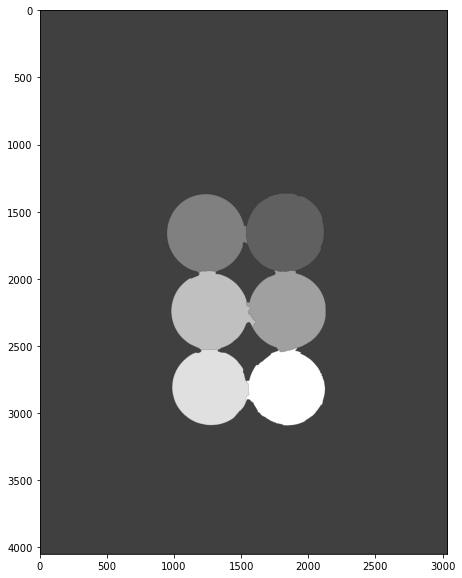

In [76]:
display(markers)

In [77]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [78]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

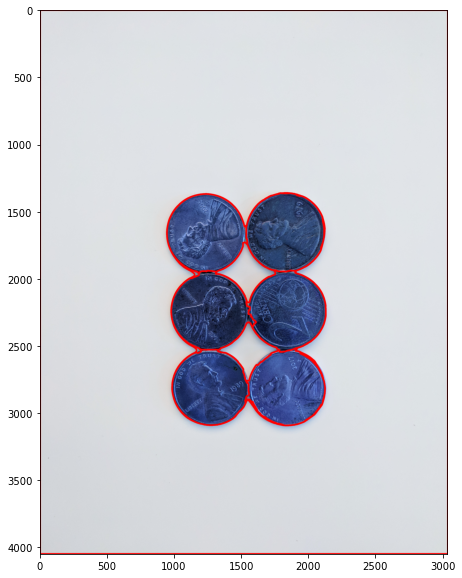

In [79]:
display(sep_coins)